In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline


In [3]:
# read the dataset from dir
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# (row, columns)
df.shape

(768, 9)

In [9]:
# distribution of outcome variable
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

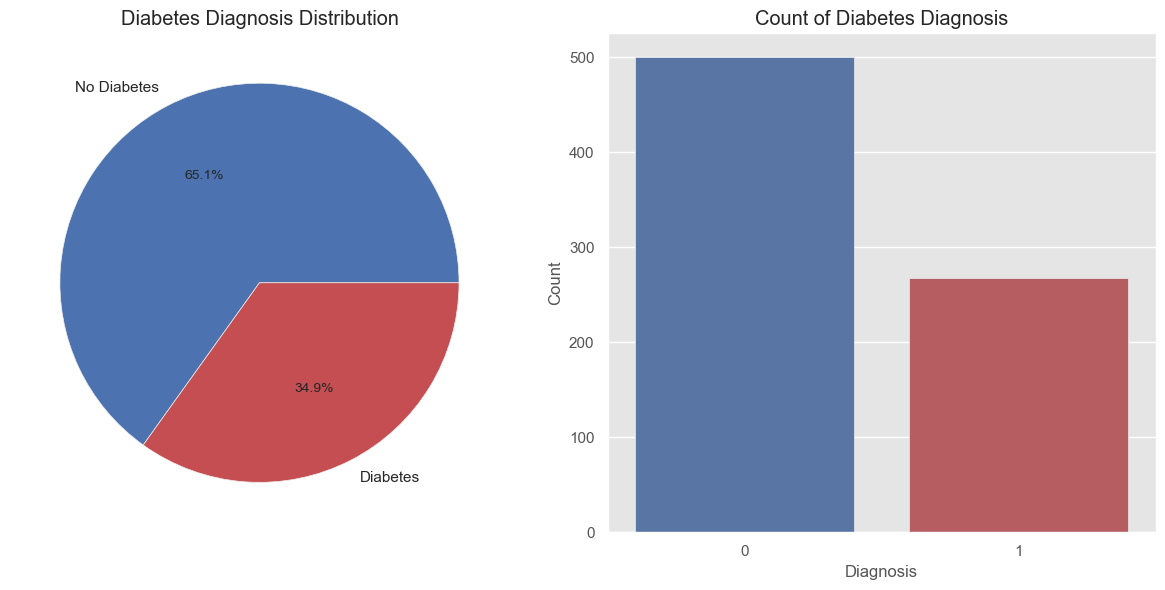

In [11]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Count the number of patients with and without diabetes
diabetes_count = df['Outcome'].value_counts()

# Create a pie chart in the first subplot with custom colors
axs[0].pie(diabetes_count, labels=['No Diabetes', 'Diabetes'],colors=['b','r'], autopct='%1.1f%%')
axs[0].set_title('Diabetes Diagnosis Distribution')

# Create a countplot in the second subplot with custom colors
sns.countplot(x='Outcome', data=df, ax=axs[1],palette=['b', 'r'])
axs[1].set_title('Count of Diabetes Diagnosis')
axs[1].set_xlabel('Diagnosis')
axs[1].set_ylabel('Count')

# Layout so plots do not overlap
plt.tight_layout()

plt.show()



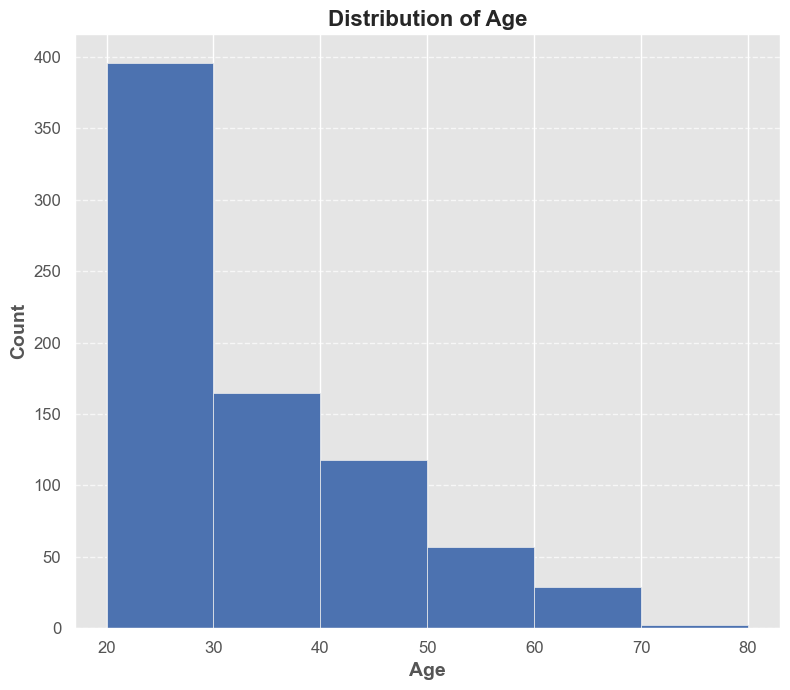

In [12]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Age', fontsize=16, fontweight='bold')
df['Age'].hist(bins=[20, 30, 40, 50, 60, 70, 80],color="b")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [13]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Outcome', ylabel='Density'>

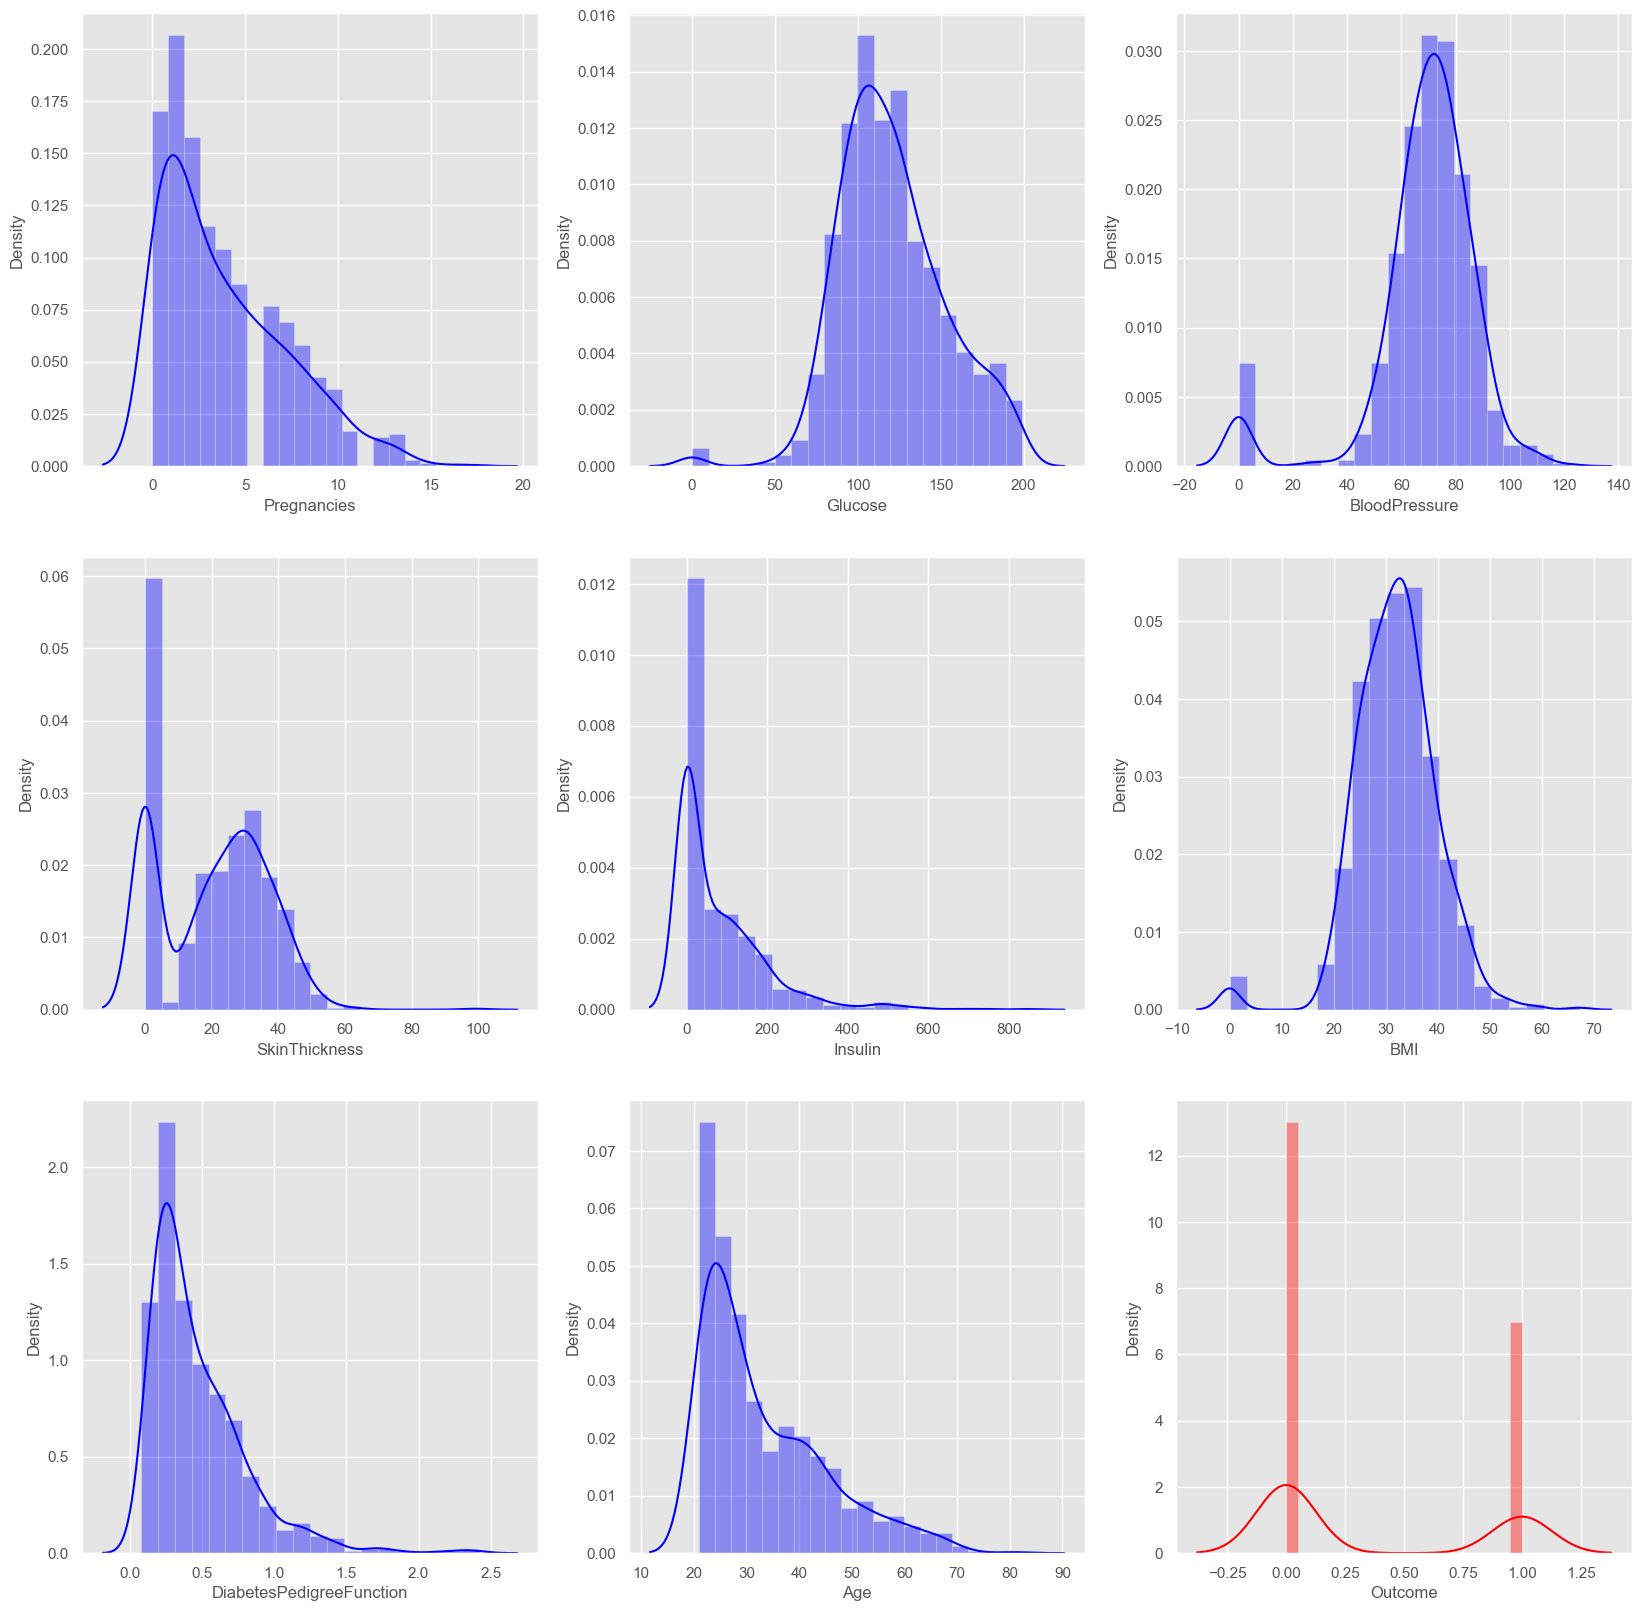

In [15]:
# density graph
fig,ax = plt.subplots(3,3, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="blue")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="blue")
sns.distplot(df.BloodPressure, bins=20, ax=ax[0,2], color="blue")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,0], color="blue")
sns.distplot(df.Insulin, bins=20, ax=ax[1,1], color="blue")
sns.distplot(df.BMI, bins=20, ax=ax[1,2], color="blue")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[2,0], color="blue")
sns.distplot(df.Age, bins=20, ax=ax[2,1], color="blue")
sns.distplot(df.Outcome, bins=20, ax=ax[2,2], color="red")

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [19]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [20]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [21]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [22]:
corr_matrix = df.corr()

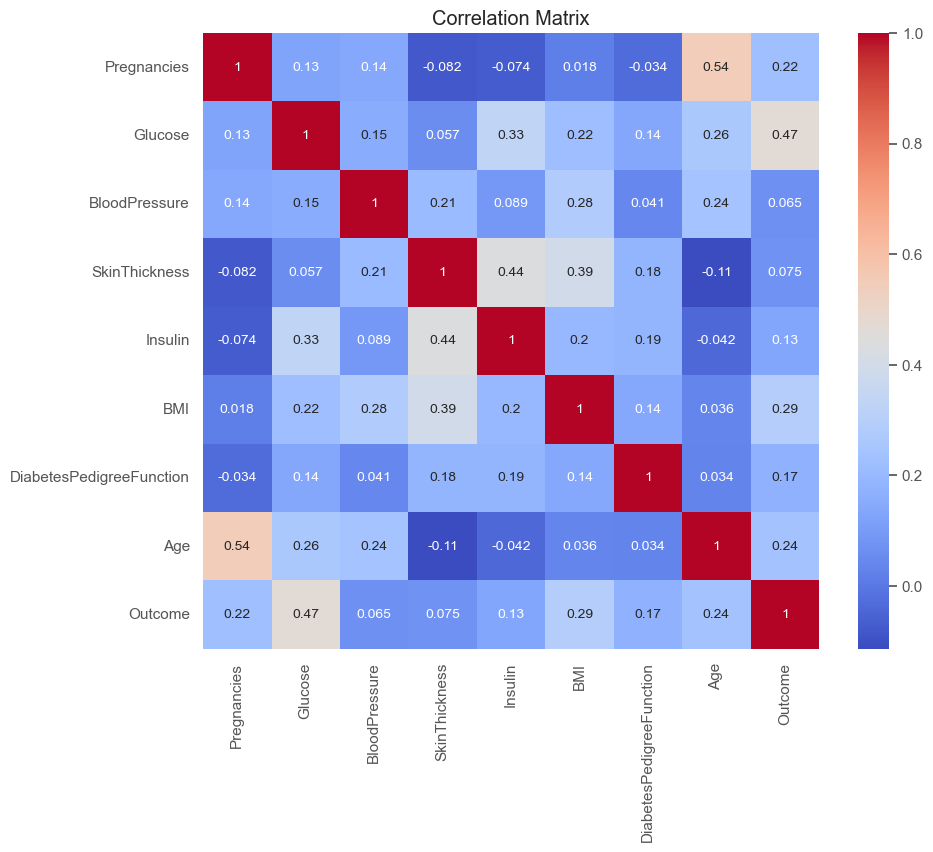

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

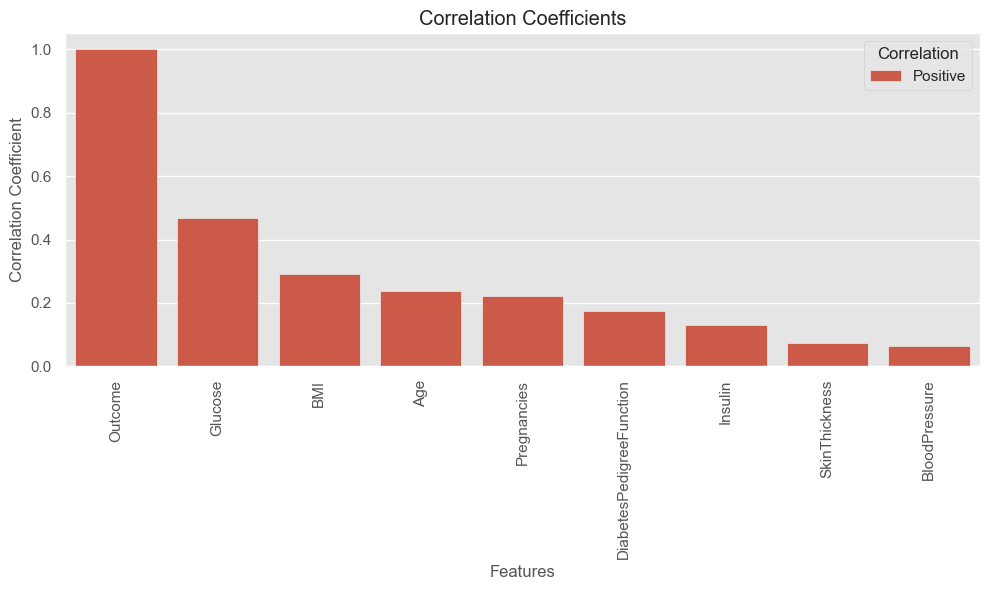

In [24]:
corr_coefficients = corr_matrix['Outcome'].sort_values(ascending=False)


df1= pd.DataFrame({'Feature': corr_coefficients.index, 
                     'Value': corr_coefficients.values, 
                     'Hue': ['Negative' if value < 0 else 'Positive' for value in corr_coefficients.values]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Value', hue='Hue', data=df1)

plt.title('Correlation Coefficients')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Correlation')
plt.show()

In [25]:
# EDA Part Completed
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Data preprocessing Part
df2=df.copy()
df2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [ ]:

df2.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [28]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

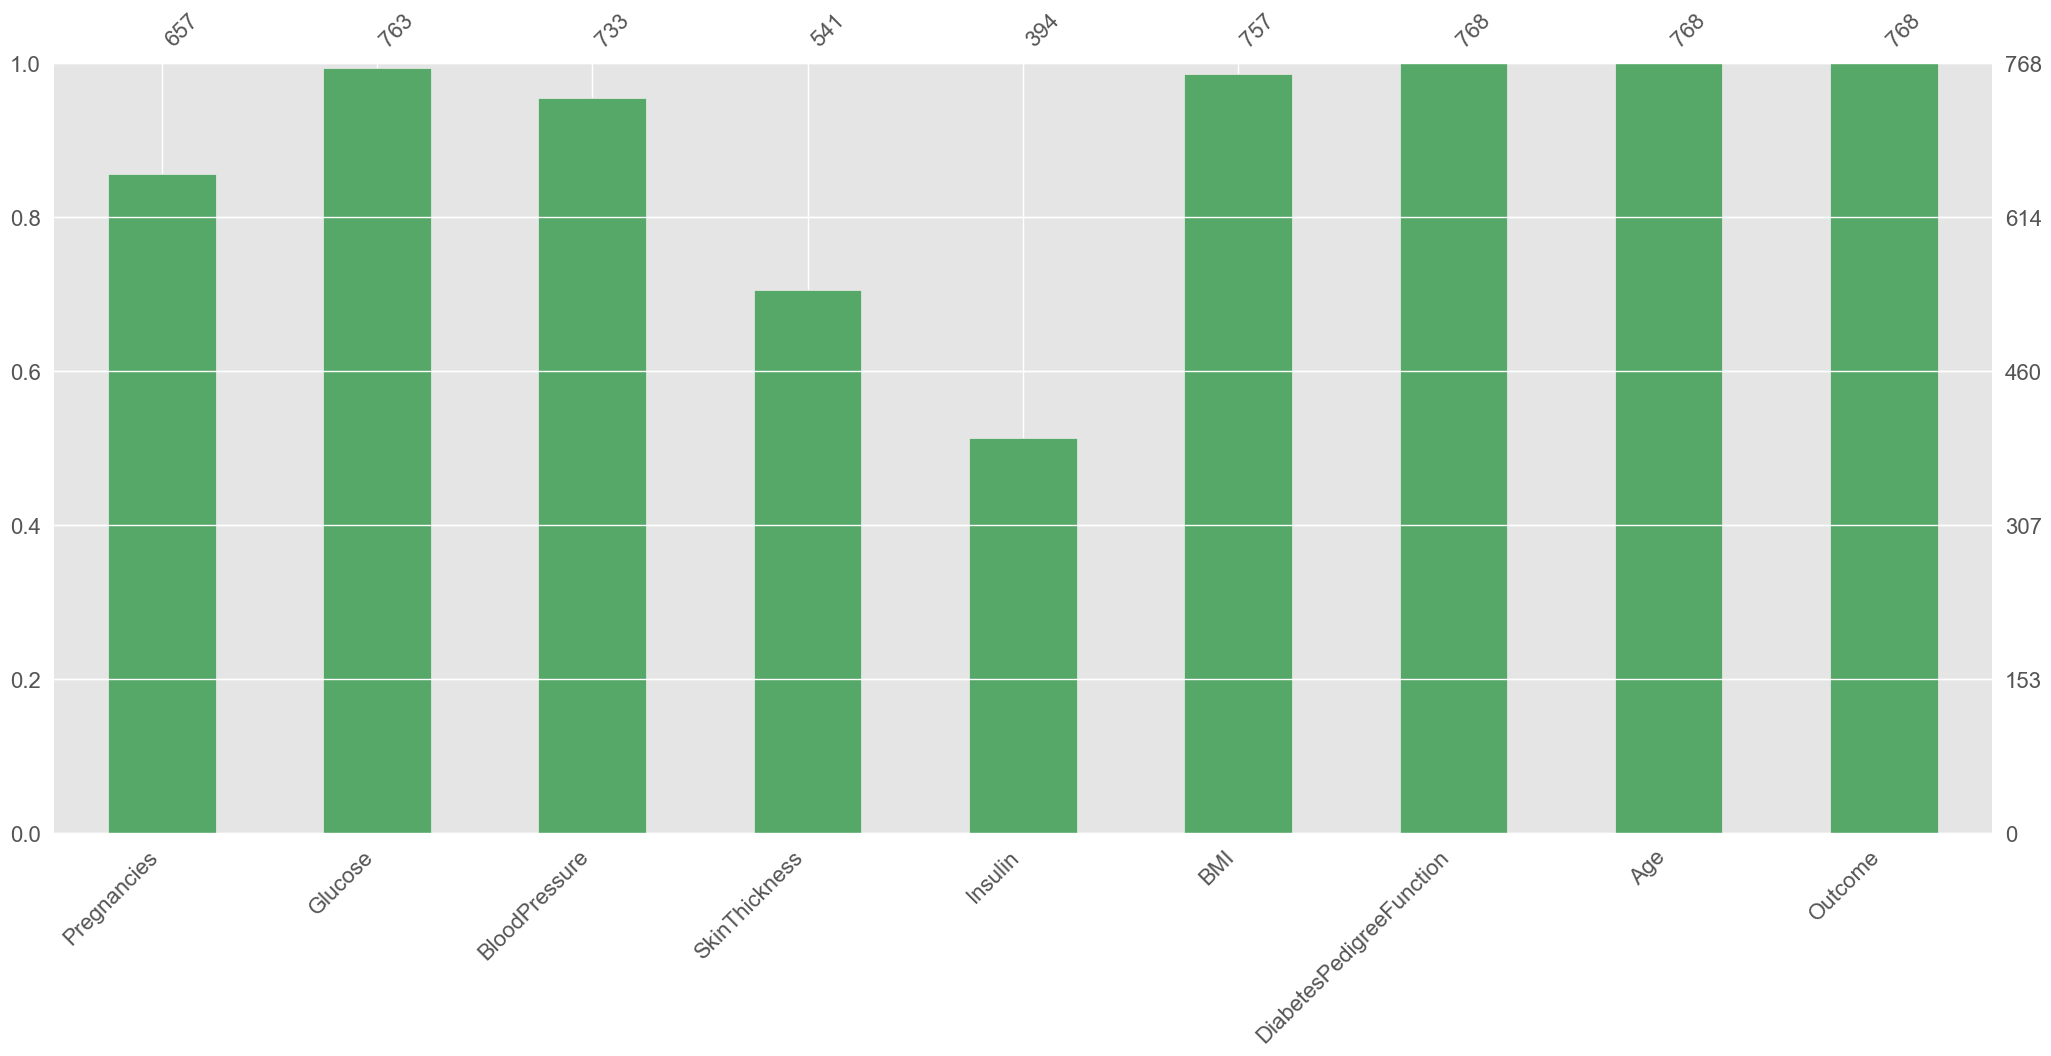

In [29]:
import missingno as msno
msno.bar(df2, color="g")

In [30]:
#Calculating mean of each target
def mean_target(var):
    """Calculate the mean of a variable for each class of the target variable."""
    temp = df2[[var, 'Outcome']].dropna(subset=[var])
    mean_values = temp.groupby('Outcome')[var].mean().reset_index()
    mean_values[var] = mean_values[var].round()
    return mean_values

In [31]:
# Replace missing values with the mean of each column, calculated separately for each class of the target variable
for col in df2.columns.drop('Outcome'):
    mean_values = mean_target(col)
    df2.loc[(df['Outcome'] == 0) & (df2[col].isnull()), col] = mean_values.loc[0, col]
    df2.loc[(df['Outcome'] == 1) & (df2[col].isnull()), col] = mean_values.loc[1, col]


In [32]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,207.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,130.0,26.6,0.351,31,0
2,8.0,183.0,64.0,33.0,207.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,6.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [33]:

df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

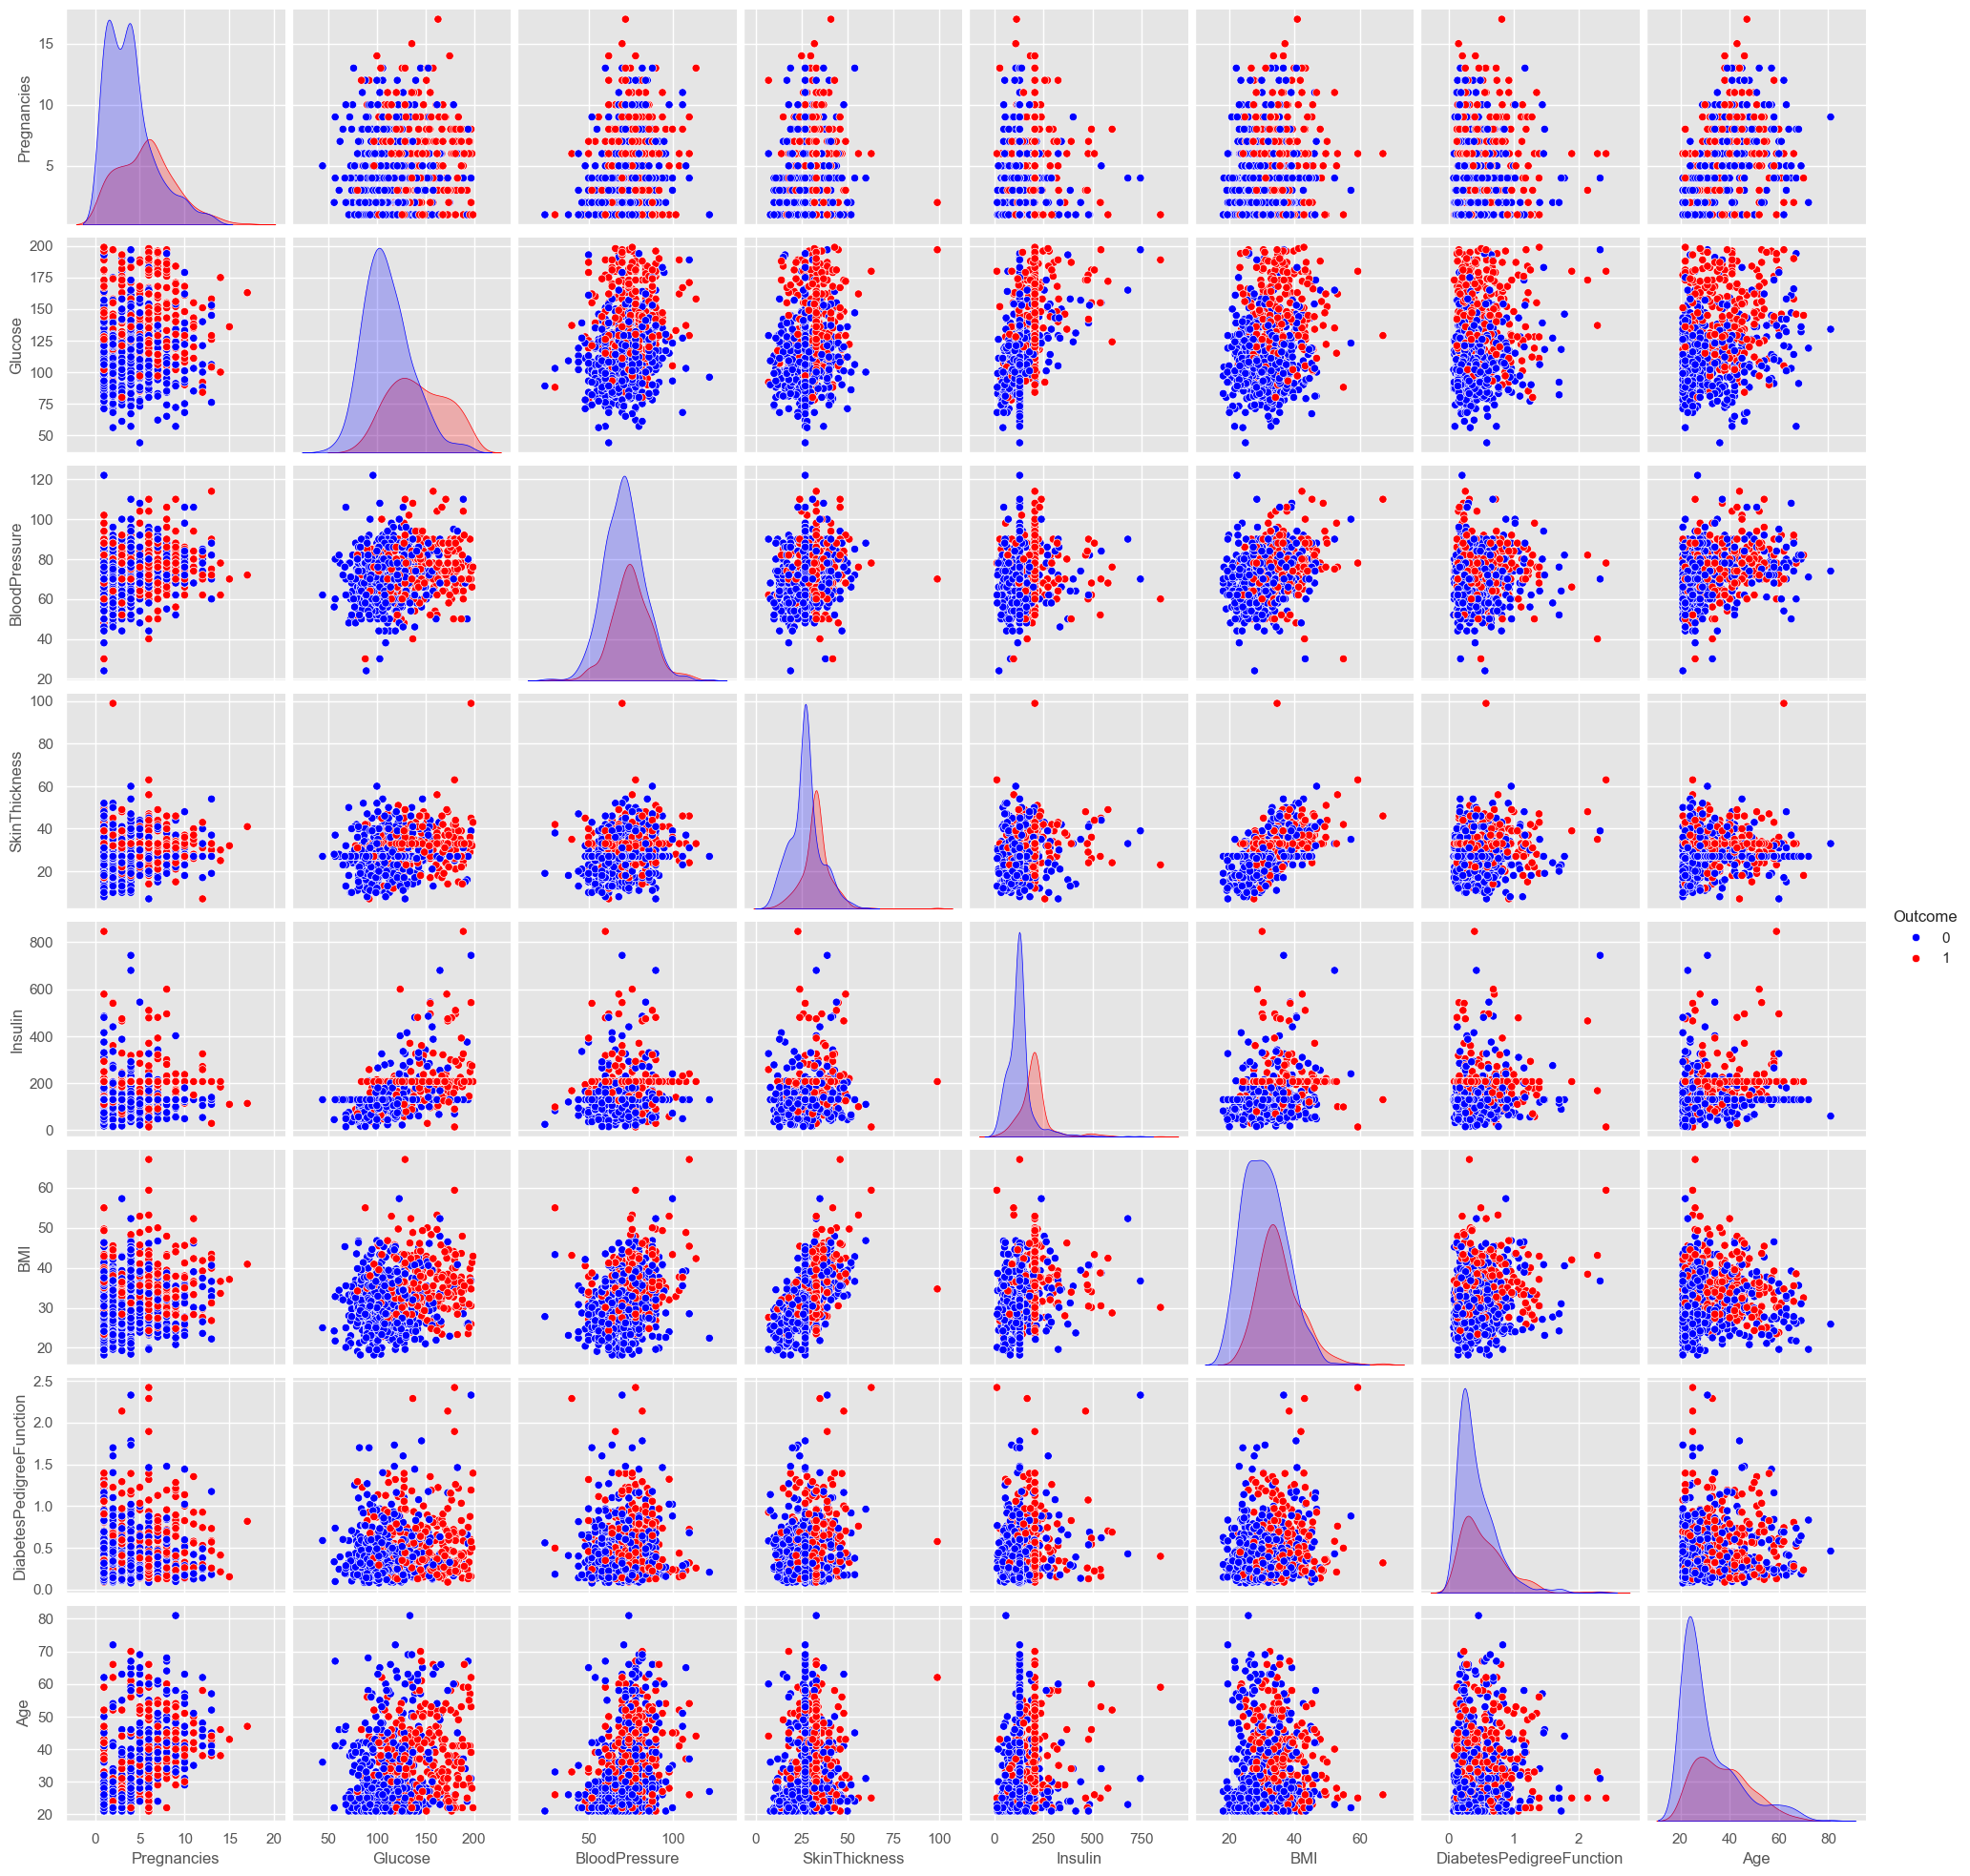

In [34]:
# pair plot
p = sns.pairplot(df2, hue="Outcome", palette=["blue", "red"])

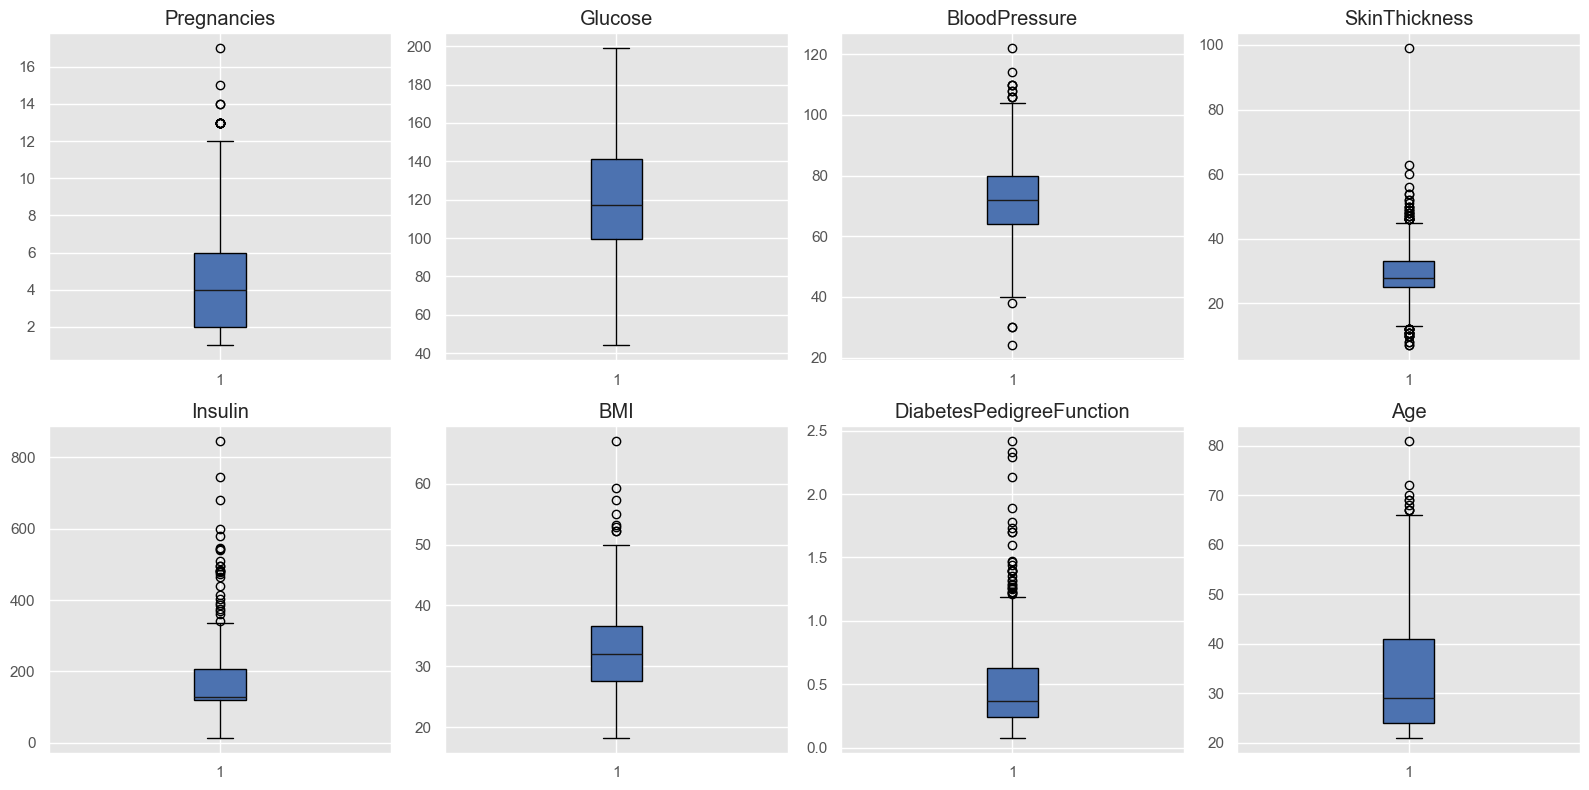

In [35]:
columns = [col for col in df2.columns if col != 'Outcome']

# Create a figure with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Iterate over the columns and subplots
for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    bp = axs[row, col_idx].boxplot(df2[col], patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('b')  # Set box color to light blue
    for median in bp['medians']:
        median.set_color('k')  # Set median line color to red
    axs[row, col_idx].set_title(col)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()



In [36]:
# Calculate Q1 and Q3 for each column
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Impute outliers with Q1 or Q3 values
df_imputed = df2.copy()
for col in df2.columns:
    df_imputed[col] = df_imputed[col].mask(df_imputed[col] < (Q1[col] - 1.5 * IQR[col]), Q1[col])
    df_imputed[col] = df_imputed[col].mask(df_imputed[col] > (Q3[col] + 1.5 * IQR[col]), Q3[col])

print("Original shape:", df2.shape)
print("Imputed shape:", df_imputed.shape)


Original shape: (768, 9)
Imputed shape: (768, 9)


In [37]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df_imputed:
    Q1 = df_imputed[feature].quantile(0.25)
    Q3 = df_imputed[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df_imputed[(df_imputed[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


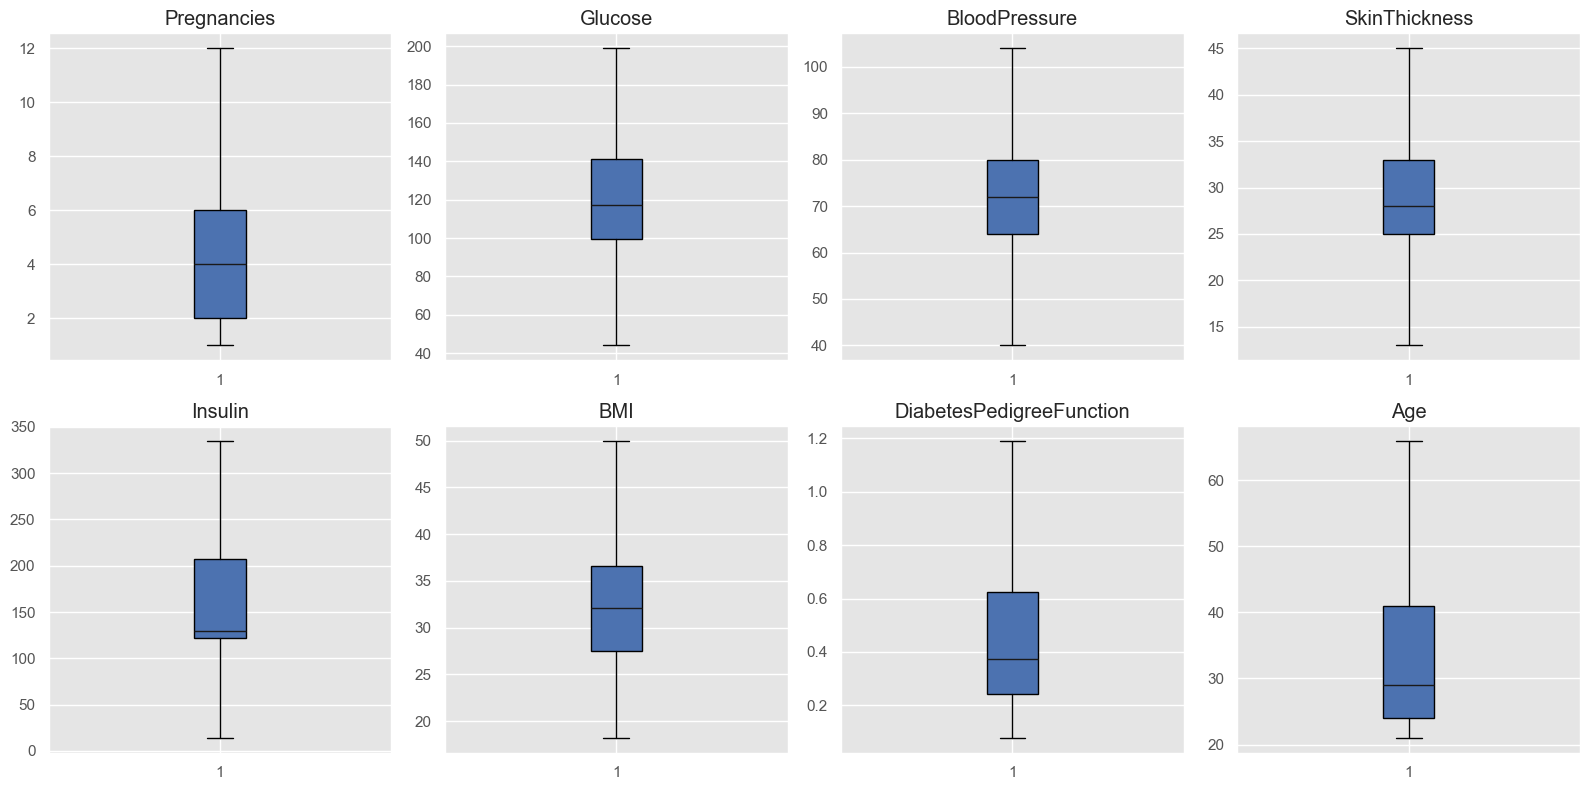

In [38]:
columns = [col for col in df_imputed.columns if col != 'Outcome']

# Create a figure with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Iterate over the columns and subplots
for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    bp = axs[row, col_idx].boxplot(df_imputed[col], patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('b')  # Set box color to light blue
    for median in bp['medians']:
        median.set_color('k')  # Set median line color to black
    axs[row, col_idx].set_title(col)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

In [39]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [40]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [41]:
df_imputed['NewBMI'] = NewBMI
df_imputed.loc[df_imputed["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df_imputed.loc[(df_imputed["BMI"]>18.5) & df_imputed["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df_imputed.loc[(df_imputed["BMI"]>24.9) & df_imputed["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df_imputed.loc[(df_imputed["BMI"]>29.9) & df_imputed["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df_imputed.loc[(df_imputed["BMI"]>34.9) & df_imputed["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df_imputed.loc[df_imputed["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [42]:
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,207.0,33.6,0.62700,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,130.0,26.6,0.35100,31,0,Obesity 2
2,8.0,183.0,64.0,33.0,207.0,23.3,0.67200,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21,0,Obesity 2
4,6.0,137.0,40.0,35.0,168.0,43.1,0.62625,33,1,Obesity 3


In [43]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [44]:
df3 = df_imputed.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [45]:
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,207.0,33.6,0.62700,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,130.0,26.6,0.35100,31,0,Obesity 2,Abnormal
2,8.0,183.0,64.0,33.0,207.0,23.3,0.67200,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21,0,Obesity 2,Normal
4,6.0,137.0,40.0,35.0,168.0,43.1,0.62625,33,1,Obesity 3,Abnormal


In [46]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df3["NewGlucose"] = NewGlucose
df3.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df3.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df3.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df3.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [47]:
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,207.0,33.6,0.62700,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,130.0,26.6,0.35100,31,0,Obesity 2,Abnormal,Normal
2,8.0,183.0,64.0,33.0,207.0,23.3,0.67200,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21,0,Obesity 2,Normal,Normal
4,6.0,137.0,40.0,35.0,168.0,43.1,0.62625,33,1,Obesity 3,Abnormal,Secret


In [48]:
# One hot encoding
df_final = pd.get_dummies(df3, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True).astype(int)


In [49]:
df_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,207,33,0,50,1,0,1,0,0,0,0,0,0,0,1
1,1,85,66,29,130,26,0,31,0,0,1,0,0,0,0,0,1,0,0
2,8,183,64,33,207,23,0,32,1,0,1,0,0,0,0,0,0,0,1
3,1,89,66,23,94,28,0,21,0,0,1,0,0,0,1,0,1,0,0
4,6,137,40,35,168,43,0,33,1,0,0,1,0,0,0,0,0,0,1


In [50]:
df_final.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [51]:
categorical_df = df_final[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [52]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [53]:
y=df_final['Outcome']
X=df_final.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [54]:
cols = X.columns
index = X.index

In [55]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,207,33,0,50
1,1,85,66,29,130,26,0,31
2,8,183,64,33,207,23,0,32
3,1,89,66,23,94,28,0,21
4,6,137,40,35,168,43,0,33


In [56]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [57]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.50,0.751515,0.000,0.875,0.900585,0.111111,0.0,1.235294
1,-0.75,-0.775758,-0.375,0.125,0.000000,-0.666667,0.0,0.117647
2,1.00,1.600000,-0.500,0.625,0.900585,-1.000000,0.0,0.176471
3,-0.75,-0.678788,-0.375,-0.625,-0.421053,-0.444444,0.0,-0.470588
4,0.50,0.484848,-2.000,0.875,0.444444,1.222222,0.0,0.235294


In [58]:
X = pd.concat([X, categorical_df], axis=1)

In [59]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.50,0.751515,0.000,0.875,0.900585,0.111111,0.0,1.235294,0,1,0,0,0,0,0,0,0,1
1,-0.75,-0.775758,-0.375,0.125,0.000000,-0.666667,0.0,0.117647,0,1,0,0,0,0,0,1,0,0
2,1.00,1.600000,-0.500,0.625,0.900585,-1.000000,0.0,0.176471,0,1,0,0,0,0,0,0,0,1
3,-0.75,-0.678788,-0.375,-0.625,-0.421053,-0.444444,0.0,-0.470588,0,1,0,0,0,1,0,1,0,0
4,0.50,0.484848,-2.000,0.875,0.444444,1.222222,0.0,0.235294,0,0,1,0,0,0,0,0,0,1


In [60]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [61]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [62]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Machine Learning Algo

In [64]:
# Logistic Regreesion

In [65]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred = log_reg.predict(X_test)

In [67]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8289902280130294

In [68]:
accuracy_score(y_test, log_reg.predict(X_test))

0.8181818181818182

In [69]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [70]:
confusion_matrix(y_test, y_pred)

array([[91, 16],
       [12, 35]])

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       107
           1       0.69      0.74      0.71        47

    accuracy                           0.82       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.82      0.82      0.82       154



In [72]:
# KNN

In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8713355048859935
0.8571428571428571
[[92 15]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       107
           1       0.73      0.85      0.78        47

    accuracy                           0.86       154
   macro avg       0.83      0.86      0.84       154
weighted avg       0.87      0.86      0.86       154



In [74]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [75]:
# best_parameter
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [76]:
grid_search.best_score_

np.float64(0.8696921231507396)

In [77]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8843648208469055
0.8376623376623377
[[91 16]
 [ 9 38]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       107
           1       0.70      0.81      0.75        47

    accuracy                           0.84       154
   macro avg       0.81      0.83      0.82       154
weighted avg       0.85      0.84      0.84       154



In [78]:
# Decision Tree

In [79]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8636363636363636
[[96 11]
 [10 37]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       107
           1       0.77      0.79      0.78        47

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



In [80]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [81]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [82]:
grid_search_dt.best_score_

np.float64(0.86)

In [83]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8908794788273615
0.8896103896103896
[[98  9]
 [ 8 39]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       107
           1       0.81      0.83      0.82        47

    accuracy                           0.89       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.89      0.89      0.89       154



In [84]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [85]:
y_pred = rand_clf.predict(X_test)

In [86]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9853420195439739
0.8961038961038961
[[97 10]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       107
           1       0.80      0.87      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.89      0.88       154
weighted avg       0.90      0.90      0.90       154



In [87]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [88]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 180}

In [89]:
grid_search_gbc.best_score_

np.float64(0.8810946589106294)

In [90]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [91]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.990228013029316
0.8961038961038961
[[98  9]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.82      0.85      0.83        47

    accuracy                           0.90       154
   macro avg       0.87      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



In [92]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [93]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9625407166123778
0.8766233766233766
[[99  8]
 [11 36]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       107
           1       0.82      0.77      0.79        47

    accuracy                           0.88       154
   macro avg       0.86      0.85      0.85       154
weighted avg       0.88      0.88      0.88       154



In [94]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,89.61
5,Gradient Boosting Classifier,89.61
3,Decision Tree Classifier,88.96
6,XgBoost,87.66
1,KNN,85.71
2,SVM,83.77
0,Logistic Regression,81.82


In [95]:
import pickle
model = gbc
filename ='diabetes.pkl'
pickle.dump(model, open(filename,'wb'))

In [96]:
gbc_load = pickle.load(open(filename, 'rb'))

In [97]:
print(type(gbc_load))


<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


In [98]:
# Make predictions using the loaded model
y_pred = gbc_load.predict(X_test)


In [99]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.82      0.85      0.83        47

    accuracy                           0.90       154
   macro avg       0.87      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154



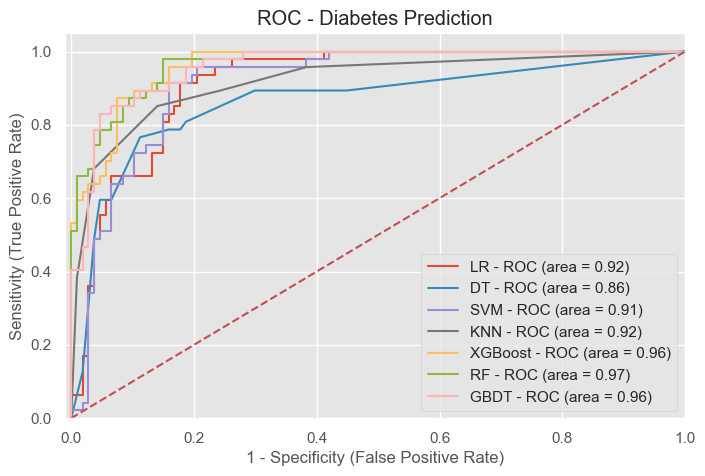

In [100]:
from sklearn import metrics

plt.figure(figsize=(8,5))
models = [ 
    {'label': 'LR', 'model': log_reg}, 
    {'label': 'DT', 'model': DT}, 
    {'label': 'SVM', 'model': svc}, 
    {'label': 'KNN', 'model': knn}, 
    {'label': 'XGBoost', 'model': xgb}, 
    {'label': 'RF', 'model': rand_clf}, 
    {'label': 'GBDT', 'model': gbc}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.auc(fpr1, tpr1)
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('ROC - Diabetes Prediction')
plt.legend(loc="lower right")
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


[81.82000000000001, 88.96, 83.77, 85.71, 87.66000000000001, 89.61, 89.61]
[np.float64(79.75999999999999), np.float64(77.58), np.float64(82.95), np.float64(85.54), np.float64(84.56), np.float64(88.94), np.float64(89.41)]


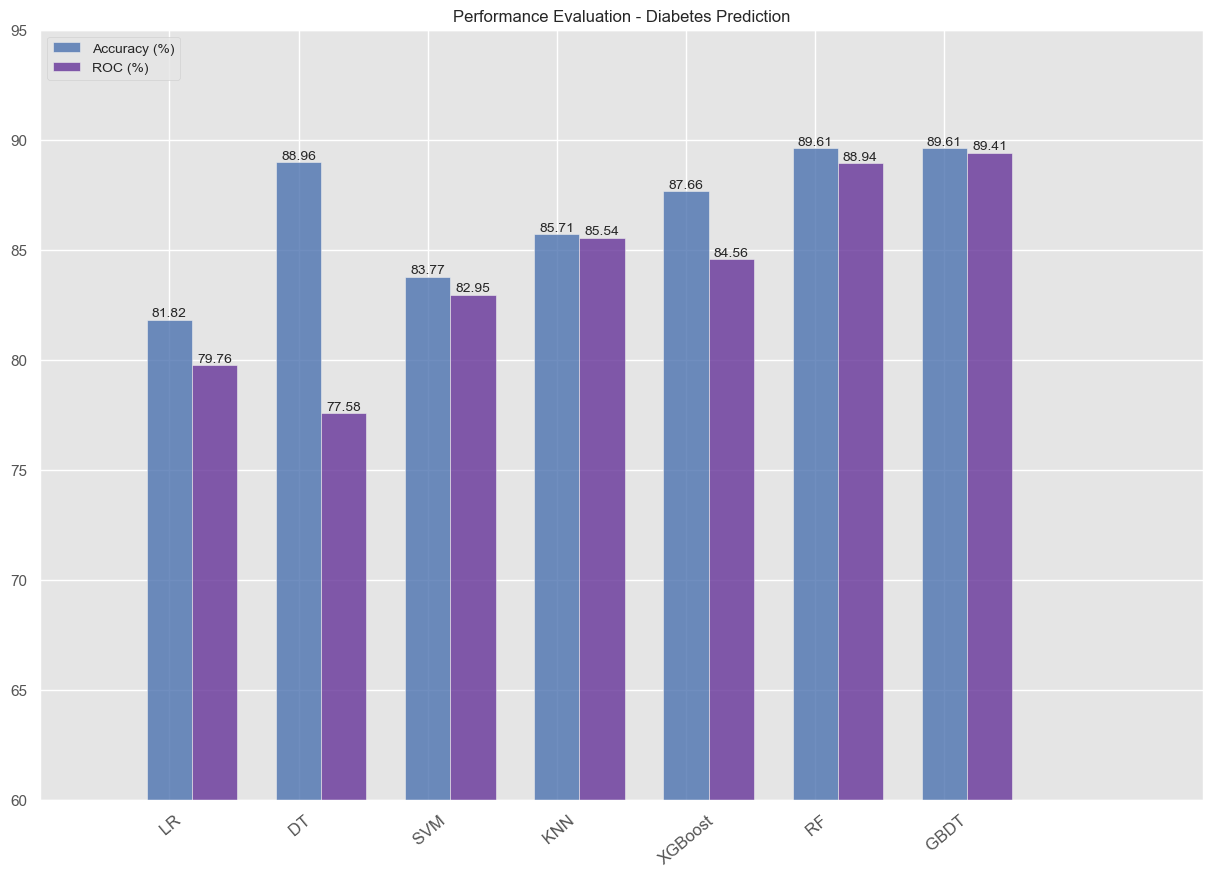

In [101]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': DT},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc},
]

means_roc = []
means_accuracy = [
    100 * round(log_reg_acc, 4),
    100 * round(dt_acc, 4),
    100 * round(svc_acc, 4),
    100 * round(knn_acc, 4),
    100 * round(xgb_acc, 4),
    100 * round(rand_acc, 4),
    100 * round(gbc_acc, 4),
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = 100 * round(metrics.roc_auc_score(y_test, y_pred), 4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# Data to plot
n_groups = 7

# Create plot
fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='b', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC (%)')

# Add values above bars
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height,
            '%.2f' % height,
            ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2., height,
            '%.2f' % height,
            ha='center', va='bottom')

plt.xlim([-1, 8])
plt.ylim([60, 95])
plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, (' LR', ' DT', ' SVM', ' KNN', 'XGBoost', ' RF', ' GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper left", fontsize=10)

plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

